In [1]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [2]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')
plottingdata = pd.read_csv('longformdata_DF_plotting.csv')

In [3]:
display(updatedchoicedata)

,PROLIFIC_ID,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,choice,rej-acc,ifnegvalue
0,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1
1,568d286ab5a2c2000cb6a91c,1,1.0,1.5,4.5,4.5,1.000000,-0.5,1
2,568d286ab5a2c2000cb6a91c,2,1.0,3.5,5.0,5.0,1.000000,-0.5,1
3,595727bd7c76640001aa8f6e,0,1.0,4.0,5.0,5.0,0.600000,1.0,0
4,595727bd7c76640001aa8f6e,1,1.0,4.0,7.0,7.0,0.250000,1.0,0
...,...,...,...,...,...,...,...,...,...
241,641361334c91a0c6ff4c5b79,1,1.0,1.0,9.0,9.0,1.000000,0.0,0
242,641361334c91a0c6ff4c5b79,2,1.0,1.0,9.0,9.0,1.000000,0.0,0
243,641a3df3c874807a1a8734bc,0,1.0,3.0,6.0,6.0,0.500000,-1.0,1
244,641a3df3c874807a1a8734bc,1,1.0,3.0,6.0,6.0,0.166667,-1.0,1


In [4]:
display(plottingdata)

,subID,Social Condition,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,Choice,rej-acc,ifnegvalue
0,568d286ab5a2c2000cb6a91c,Neutral,0,1,4.0,5.0,5.0,0.833333,-0.5,1
1,595727bd7c76640001aa8f6e,Neutral,0,1,4.0,5.0,5.0,0.600000,1.0,0
2,5a4636c92f91ec0001dcba07,Neutral,0,0,3.0,6.0,4.0,0.000000,-0.5,1
3,5ad2c8334d061300011b1985,Neutral,0,0,2.0,3.0,7.0,0.500000,-1.5,1
4,5adef850eb60400001539109,Neutral,0,0,3.0,4.0,6.0,1.000000,2.5,0
...,...,...,...,...,...,...,...,...,...,...
196,63eac31811a6da58d4f32d76,Acceptance,2,1,3.0,9.0,9.0,0.000000,0.0,0
197,63fac97f0d4e8f6bfd753d90,Acceptance,2,1,1.0,5.0,5.0,0.000000,0.0,0
198,64023a98627b1116180dff0b,Acceptance,2,1,4.0,6.0,6.0,0.000000,-4.0,1
199,641361334c91a0c6ff4c5b79,Acceptance,2,1,1.0,9.0,9.0,1.000000,0.0,0


In [5]:
anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [6]:
print(anovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.112435    2  0.056217  2.001339  0.138482   0.143496   
1             Error  4.550562  162  0.028090       NaN       NaN        NaN   

        ng2       eps sphericity  W-spher   p-spher  
0  0.002833  0.901039      False  0.89017  0.009526  
1       NaN       NaN        NaN      NaN       NaN  


In [7]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  51.091463    2  25.545732  57.022349  1.783956e-19   
1             Error  72.575203  162   0.447995        NaN           NaN   

      p-GG-corr       ng2       eps sphericity   W-spher  p-spher  
0  1.870387e-19  0.190859  0.998789       True  0.998787  0.95262  
1           NaN       NaN       NaN        NaN       NaN      NaN  


In [8]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF         MS         F     p-unc  \
0  condition_recode   23.441057    2  11.720528  14.46917  0.000002   
1             Error  131.225610  162   0.810035       NaN       NaN   

   p-GG-corr       ng2       eps sphericity   W-spher  p-spher  
0   0.000002  0.022901  0.968705       True  0.967694  0.26886  
1        NaN       NaN       NaN        NaN       NaN      NaN  


In [9]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [10]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -5.02   81        less    0.0  [-inf, -0.51]     0.37  1.037e+04   0.96


In [11]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -2.71   81        less    0.0  [-inf, -0.15]     0.18  7.404   0.49


In [12]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d    BF10  power
T-test -2.89   81        less    0.0  [-inf, -0.16]     0.19  11.521   0.53


In [13]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

            T  dof alternative  p-val          CI95%  cohen-d       BF10  \
T-test -10.86   81        less    0.0  [-inf, -0.94]     1.25  6.472e+14   

        power  
T-test    1.0  


In [14]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -5.53   81        less    0.0  [-inf, -0.41]     0.62  7.289e+04    1.0


In [15]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -5.05   81        less    0.0  [-inf, -0.36]     0.53  1.174e+04    1.0


In [16]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
77  63fac97f0d4e8f6bfd753d90                 1                1.0   
78  6400d8ca785ee04d9b02ae9c                 1                1.0   
79  64023a98627b1116180dff0b                 1                1.0   
80  641361334c91a0c6ff4c5b79                 1                1.0   
81  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0             1.5          4.5             4.5  1.000000     -0.5           1  
1          

In [17]:
print(len(rej))
print(len(neu))
print(len(acc))

82
82
82


In [18]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [19]:
print(len(mostaffectedpps))

150


In [20]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [21]:
print(mostaffectedanovachoice)

             Source        SS  DF        MS         F    p-unc  p-GG-corr  \
0  condition_recode  0.049966   2  0.024983  0.809963  0.44783     0.4375   
1             Error  3.022787  98  0.030845       NaN      NaN        NaN   

        ng2       eps sphericity  W-spher   p-spher  
0  0.002321  0.907227       True  0.89774  0.075096  
1       NaN       NaN        NaN      NaN       NaN  


In [22]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [23]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS        F     p-unc  p-GG-corr  \
0  condition_recode  0.069332   2  0.034666  1.41315  0.251104   0.251557   
1             Error  1.520912  62  0.024531      NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.004279  0.872976       True  0.854493  0.094542  
1       NaN       NaN        NaN       NaN       NaN  


In [24]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.4438285291943828
rejchoice_std
0.3981161340257156


In [25]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.3976164079822616
accchoice_std
0.3926999286198335


In [26]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.39939024390243905
neuchoice_std
0.41929169094847435


In [31]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))
rr = pd.read_csv('%s/scoring/rr.csv'%(current_dir))
mspss = pd.read_csv('%s/scoring/mspss.csv'%(current_dir))

In [32]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']
print(len(rejchoice))
print(len(accchoice))
print(len(neuchoice))
print(len(aq))
print(len(ntbs))
print(len(mspss))

82
82
82
82
82
82


In [33]:
print(aq)

                 Prolific_ID    AQ
0   568d286ab5a2c2000cb6a91c  24.0
1   595727bd7c76640001aa8f6e  33.0
2   5a4636c92f91ec0001dcba07  32.0
3   5ad2c8334d061300011b1985  11.0
4   5adef850eb60400001539109  21.0
..                       ...   ...
77  63fac97f0d4e8f6bfd753d90  30.0
78  6400d8ca785ee04d9b02ae9c  19.0
79  64023a98627b1116180dff0b  30.0
80  641361334c91a0c6ff4c5b79  10.0
81  641a3df3c874807a1a8734bc  20.0

[82 rows x 2 columns]


In [34]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

rejstress = rej['recoded_stress']
accstress = acc['recoded_stress']
neustress = neu['recoded_stress']

rejsalience = rej['salience_mean']
accsalience = acc['salience_mean']
neusalience = neu['salience_mean']

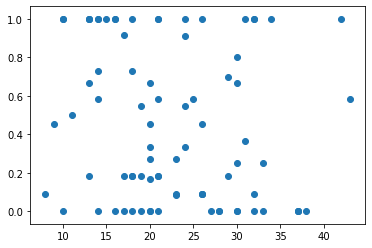

[[65.76889491 -0.58569525]
 [-0.58569525  0.15849646]]
Spearmans correlation: -0.216
p value: 0.0518
Reject the null hypothesis that the means are equal.


In [35]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],rejchoice)
pyplot.show()
covariance = cov(aq['AQ'],rejchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

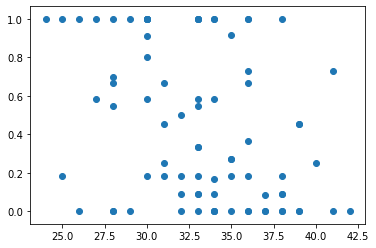

[[16.7931346  -0.58051107]
 [-0.58051107  0.15849646]]
Spearmans correlation: -0.355
p value: 0.0011
Reject the null hypothesis that the means are equal.


In [36]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rejchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rejchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

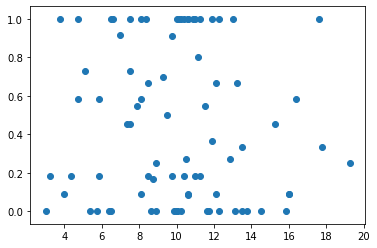

[[12.15891298 -0.09910048]
 [-0.09910048  0.15849646]]
Spearmans correlation: -0.062
p value: 0.5811
Accept null hypothesis that the means are equal.


In [37]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


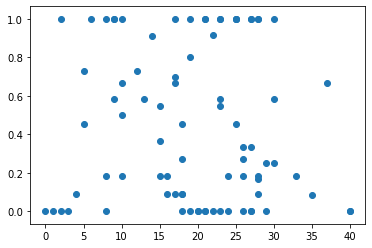

[[85.50692562 -0.27125774]
 [-0.27125774  0.15849646]]
Spearmans correlation: -0.055
p value: 0.6204
Accept null hypothesis that the means are equal.


In [38]:
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],rejchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

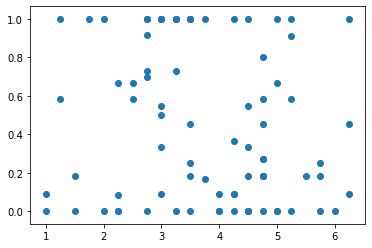

[[ 1.72959952 -0.07549364]
 [-0.07549364  0.15849646]]
Spearmans correlation: -0.133
p value: 0.2333
Accept null hypothesis that the means are equal.


In [39]:
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


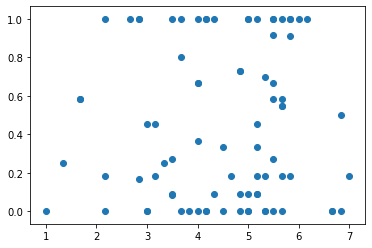

[[1.81854947 0.01725209]
 [0.01725209 0.15849646]]
Spearmans correlation: 0.046
p value: 0.6793
Accept null hypothesis that the means are equal.


In [40]:
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


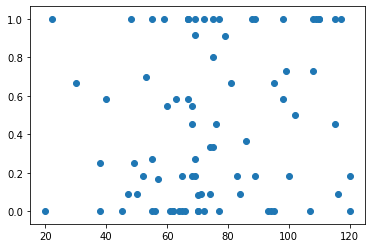

[[5.37120295e+02 1.60158769e+00]
 [1.60158769e+00 1.58496456e-01]]
Spearmans correlation: 0.190
p value: 0.0865
Reject the null hypothesis that the means are equal.


In [41]:
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],rejchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

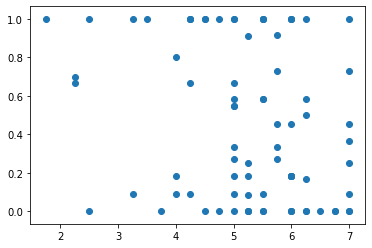

[[ 1.4358721  -0.12379714]
 [-0.12379714  0.15849646]]
Spearmans correlation: -0.242
p value: 0.0283
Reject the null hypothesis that the means are equal.


In [42]:
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],rejchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],rejchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

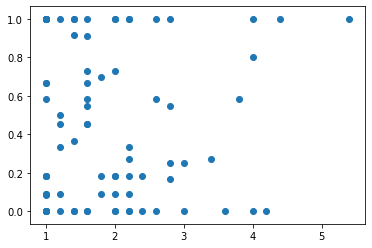

[[0.94456489 0.01104706]
 [0.01104706 0.15849646]]
Spearmans correlation: -0.031
p value: 0.7823
Accept null hypothesis that the means are equal.


In [43]:
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

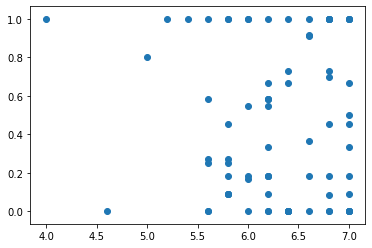

[[ 0.35775369 -0.00711241]
 [-0.00711241  0.15849646]]
Spearmans correlation: -0.023
p value: 0.8373
Accept null hypothesis that the means are equal.


In [44]:
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

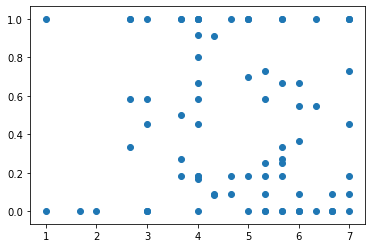

[[ 2.20263308 -0.05926914]
 [-0.05926914  0.15849646]]
Spearmans correlation: -0.122
p value: 0.2737
Accept null hypothesis that the means are equal.


In [45]:
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

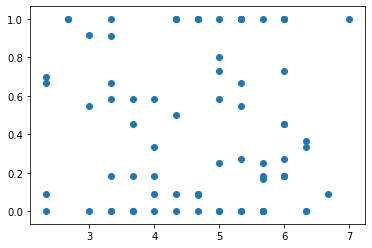

[[ 1.38748369 -0.02201494]
 [-0.02201494  0.15849646]]
Spearmans correlation: -0.025
p value: 0.8248
Accept null hypothesis that the means are equal.


In [46]:
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

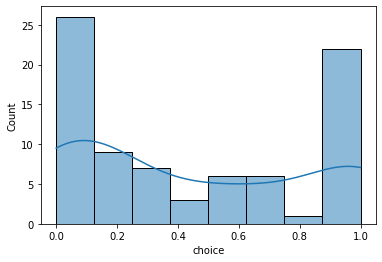

In [47]:
sns.histplot(data= rejchoice, kde=True)

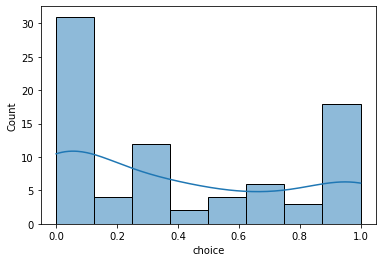

In [48]:
sns.histplot(data= accchoice, kde=True)

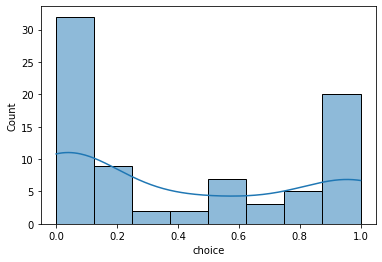

In [49]:
sns.histplot(data= neuchoice, kde=True)

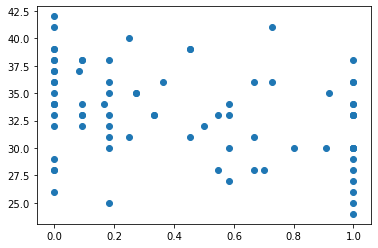

[[ 0.15849646 -0.58051107]
 [-0.58051107 16.7931346 ]]
Spearmans correlation: -0.355
p value: 0.0011
Reject the null hypothesis that the means are equal.


In [47]:
# prop_choicerej // ntbs
pyplot.scatter(rejchoice, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejchoice, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

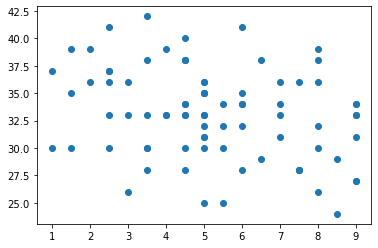

[[ 4.85941734 -2.59695875]
 [-2.59695875 16.7931346 ]]
Spearmans correlation: -0.282
p value: 0.0101
Reject the null hypothesis that the means are equal.


In [48]:
# rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



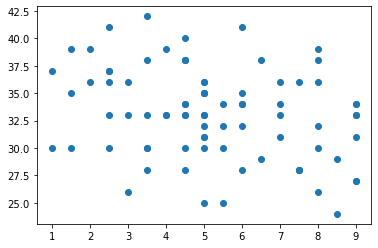

[[ 4.85941734 -2.59695875]
 [-2.59695875 16.7931346 ]]
Pearsons correlation: -0.287
p value: 0.0088
Reject the null hypothesis that the means are equal.


In [49]:
#rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

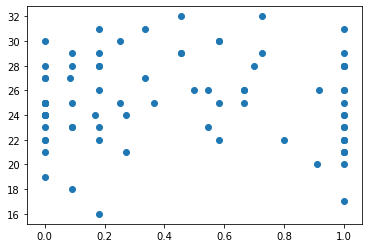

[[ 0.15849646 -0.0493704 ]
 [-0.0493704  11.92607648]]
Spearmansr correlation: -0.004
p value: 0.9730
Accept null hypothesis that the means are equal.


In [50]:
# prop_choicerej // rr
pyplot.scatter(rejchoice, rr['RR_score'])
pyplot.show()
covariance = cov(rejchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

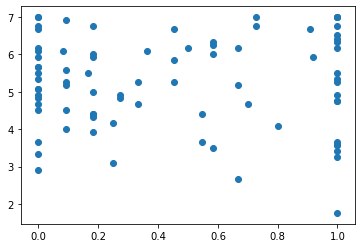

[[ 0.15849646 -0.00337293]
 [-0.00337293  1.47938309]]
Spearmansr correlation: 0.014
p value: 0.8981
Accept null hypothesis that the means are equal.


In [51]:
# prop_choicerej // mspss
pyplot.scatter(rejchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(rejchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [58]:
ntbschoicescatter = pd.DataFrame()
ntbschoicescatter['ntbs_'] = ntbs['NTBS_score']
ntbschoicescatter['rejchoice_'] = rejchoice


In [59]:
print(ntbschoicescatter)

    ntbs_  rejchoice_
0      34    1.000000
1      31    0.250000
2      38    0.090909
3      32    0.500000
4      30    1.000000
..    ...         ...
75     34    0.000000
76     32    0.000000
77     36    0.666667
78     34    1.000000
79     34    0.166667

[80 rows x 2 columns]


In [60]:
r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)[0]
scatterntbschoice = sns.scatterplot(data=ntbschoicescatter, x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)
scatterntbschoice.set_title('Need to Belong and Choice')
scatterntbschoice= plt.text(24, .8, 'r = ' + str(round(r, 2)))
plt.savefig('ntbschoicescatterplot.png')


AttributeError: 'DataFrame' object has no attribute 'ntbs'

In [57]:
ntbsstressscatter = pd.DataFrame()
ntbsstressscatter['ntbs_'] = ntbs['NTBS_score']
ntbsstressscatter['rejstress_'] = rej['recoded_stress']
print(ntbsstressscatter)


    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
62     34         9.0
63     32         5.0
64     36         2.0
65     34         9.0
66     34         6.0

[67 rows x 2 columns]


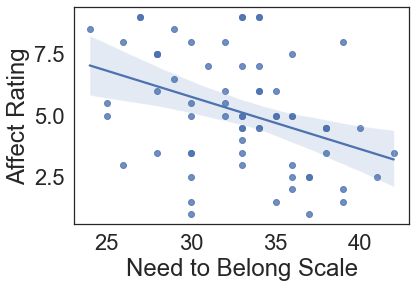

In [82]:
r = scipy.stats.pearsonr(x=ntbsstressscatter.ntbs_, y=ntbsstressscatter.rejstress_)[0]
ntbs_stress_scatter = sns.regplot(x= "ntbs_", y= "rejstress_", data= ntbsstressscatter)
ntbs_stress_scatter.set_ylabel('Affect Rating')
ntbs_stress_scatter.set_xlabel('Need to Belong Scale')
#ntbs_stress_scatter.text(24, 1.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_stress_scatter.png', bbox_inches='tight')


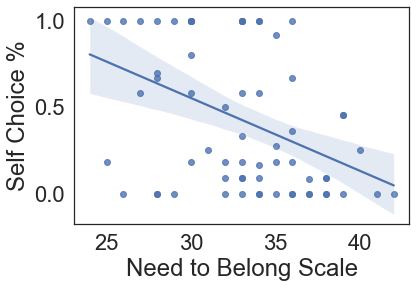

In [80]:
r = scipy.stats.spearmanr(a=ntbschoicescatter.ntbs_, b=ntbschoicescatter.rejchoice_)[0]
scatterntbschoice = sns.regplot(x= "ntbs_", y= "rejchoice_", data= ntbschoicescatter)
scatterntbschoice.set_ylabel('Self Choice %')
scatterntbschoice.set_xlabel('Need to Belong Scale')
#scatterntbschoice= plt.text(24, .85, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_choice_scatterplot.png',bbox_inches='tight')

In [60]:
ntbssaliencescatter = pd.DataFrame()
ntbssaliencescatter['ntbs_'] = ntbs['NTBS_score']
ntbssaliencescatter['salience_'] = rej['salience_mean']
print(ntbsstressscatter)

    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
62     34         9.0
63     32         5.0
64     36         2.0
65     34         9.0
66     34         6.0

[67 rows x 2 columns]


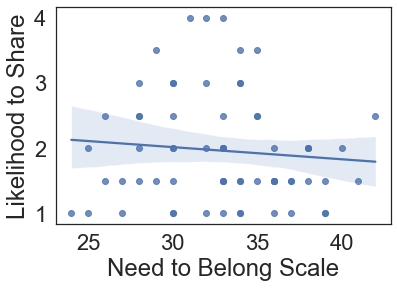

In [79]:
r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs_, y=ntbschoicescatter.rejchoice_)[0]
scatterntbssalience = sns.regplot(x= "ntbs_", y= "salience_", data= ntbssaliencescatter)
scatterntbssalience.set_ylabel('Likelihood to Share')
scatterntbssalience.set_xlabel('Need to Belong Scale')
#scatterntbssalience= plt.text(24, 3.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_salience_scatterplot.png',bbox_inches='tight')

In [48]:
aqchoicescatter = pd.DataFrame()
aqchoicescatter['AQ_'] = aq['AQ']
aqchoicescatter['rejchoice_'] = rejchoice
print(aqchoicescatter)

NameError: name 'aq' is not defined

In [47]:
r = scipy.stats.spearmanr(a=aqchoicescatter.AQ_, b=aqchoicescatter.rejchoice_)[0]
scatter_aq_choice = sns.regplot(x= "AQ_", y= "rejchoice_", data= aqchoicescatter)
scatter_aq_choice.set_title('Autism Quotient and Choice')
scatter_aq_choice.set_ylabel('Self Choice %')
scatter_aq_choice.set_xlabel('Autism Quotient')
scatter_aq_choice= plt.text(9.5, .82, 'r = ' + str(round(r, 2)))
plt.savefig('aq_choice_scatterplot.png',bbox_inches='tight')

NameError: name 'aqchoicescatter' is not defined

In [64]:
srqadmirationchoicescatter = pd.DataFrame()
srqadmirationchoicescatter['SRQ_admiration_'] = srq['SRQ_admiration']
srqadmirationchoicescatter['rejchoice_'] = rejchoice
print(srqadmirationchoicescatter)

    SRQ_admiration_  rejchoice_
0              2.50    1.000000
1              5.25    0.250000
2              4.00    0.090909
3              6.25    0.500000
4              6.00    1.000000
..              ...         ...
62             6.25    0.000000
63             6.00    0.000000
64             5.00    0.666667
65             7.00    1.000000
66             6.25    0.166667

[67 rows x 2 columns]


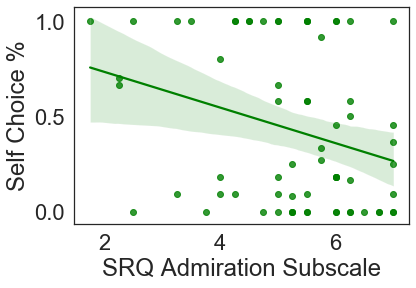

In [78]:
r = scipy.stats.spearmanr(a=srqadmirationchoicescatter.SRQ_admiration_, b=srqadmirationchoicescatter.rejchoice_)[0]
scatter_srqadmiration_choice = sns.regplot(x= "SRQ_admiration_", y= "rejchoice_", data= srqadmirationchoicescatter, scatter_kws={"color": "green"}, line_kws={"color": "green"})
scatter_srqadmiration_choice.set_ylabel('Self Choice %')
scatter_srqadmiration_choice.set_xlabel('SRQ Admiration Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('srqadmiration_choice_scatterplot.png', bbox_inches='tight')

In [323]:
#affect ratings in rejection condition
rejstress_mean = rej['recoded_stress'].mean()
rejstress_std = rej['recoded_stress'].std()
print('rejstress_mean')
print(rejstress_mean)
print('rejstress_std')
print(rejstress_std)

rejstress_mean
5.149253731343284
rejstress_std
2.29131252146201


In [324]:
#affect ratings in neutral condition
neustress_mean = neu['recoded_stress'].mean()
neustress_std = neu['recoded_stress'].std()
print('neustress_mean')
print(neustress_mean)
print('neustress_std')
print(neustress_std)

neustress_mean
5.537313432835821
neustress_std
2.141426586300309


In [325]:
#affect ratings in acceptance condition
accstress_mean = acc['recoded_stress'].mean()
accstress_std = acc['recoded_stress'].std()
print('accstress_mean')
print(accstress_mean)
print('accstress_std')
print(accstress_std)

accstress_mean
5.888059701492537
accstress_std
1.8946113688052153


AttributeError: 'Rectangle' object has no property 'errorbar'

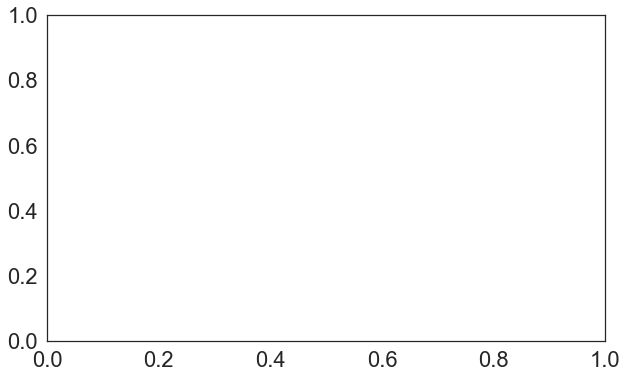

In [74]:
#sns.set(font_scale=2)
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='Choice', palette='rocket',data= plottingdata,errorbar=('ci', 68))
choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
choiceplot.set_ylim(0,1)
choiceplot.figure.savefig('ANOVA_choiceplot.png',bbox_inches='tight')

AttributeError: 'Rectangle' object has no property 'errorbar'

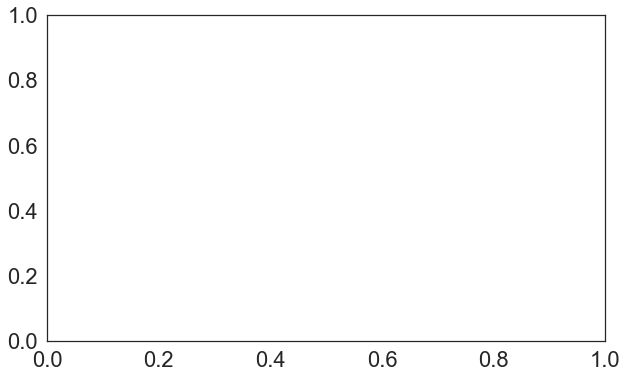

In [71]:
#sns.set(font_scale=2)
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='recoded_stress', data= plottingdata,palette= 'rocket',errorbar=('ci', 68))
choiceplot.set_ylabel('Affect Rating')
choiceplot.set_xlabel('Social Condition')
choiceplot.set_ylim(1, 9)
choiceplot.figure.savefig('ANOVA_affectplot.png',bbox_inches='tight')

AttributeError: 'Rectangle' object has no property 'errorbar'

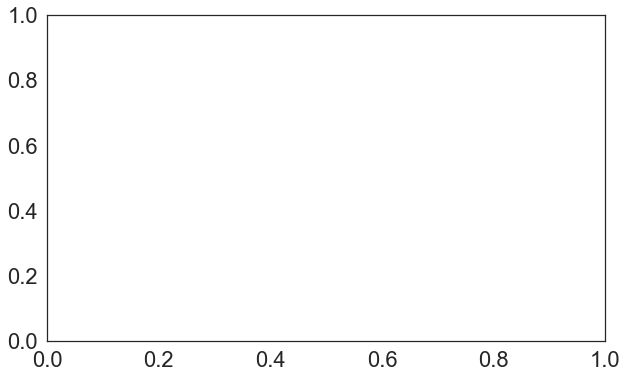

In [73]:
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='salience_mean', data= plottingdata,palette= 'rocket',errorbar=('ci', 68))
choiceplot.set_ylabel('Likelihood to Share')
choiceplot.set_xlabel('Social Condition')
choiceplot.set_ylim(1, 7)
choiceplot.figure.savefig('ANOVA_sharingplot.png',bbox_inches='tight')